In [114]:
from numpy import array

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

In [126]:
! pip install sktime==0.4.3
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
# from pylab import rcParams

rcParams['figure.figsize'] = 18, 8
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose

#-----------------------Imports from Sktime-------------------------
from sktime.forecasting.base import ForecastingHorizon
from sktime.transformers.single_series.detrend import Deseasonalizer, Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.model_selection import (
    temporal_train_test_split,
)
from sktime.utils.plotting import plot_series
from sktime.forecasting.compose import (
    TransformedTargetForecaster,
    ReducedRegressionForecaster
)

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


NameError: name 'rcParams' is not defined

In [262]:
# raw = pd.read_csv("datasets/all_features.csv")
# raw = raw.drop(columns = ["SOFR","SOFRVOL","EFFRVOL","OBFR","OBFRVOL","EFFRVOL_DIFF"
#                           ,"OBFR_DIFF","OBFRVOL_DIFF", "SOFR_DIFF", "SOFRVOL_DIFF"]).dropna()
# train = raw[raw["date"] < "2018-00-00"]
# test = raw[raw["date"] > "2018-00-00"]
# list(test['SP500_UNNORM'])



# ra

In [267]:
for date in ['2020-01-10','2020-03-06','2019-07-12']:
    date_list_=raw[raw['date']==date]
    print(date)
    print(date_list_['SP500_UNNORM'])

2020-01-10
6000    3265.35
Name: SP500_UNNORM, dtype: float64
2020-03-06
6049    2972.37
Name: SP500_UNNORM, dtype: float64
2019-07-12
5842    3013.77
Name: SP500_UNNORM, dtype: float64


[(7, '2020-01-10'),
 6    3277.425325
 dtype: float64,
 (30, '2020-01-10'),
 23    3263.298346
 dtype: float64,
 (365, '2020-01-10'),
 290    3274.588441
 dtype: float64,
 (7, '2020-03-06'),
 5    3126.567439
 dtype: float64,
 (30, '2020-03-06'),
 23    3019.358323
 dtype: float64,
 (365, '2020-03-06'),
 291    3032.084774
 dtype: float64,
 (7, '2019-07-12'),
 5    2989.185146
 dtype: float64,
 (30, '2019-07-12'),
 24    3005.945307
 dtype: float64,
 (365, '2019-07-12'),
 292    3001.357312
 dtype: float64]

In [286]:
import warnings; warnings.simplefilter('ignore')

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
raw = pd.read_csv("datasets/all_features.csv")
raw = raw.drop(columns = ["SOFR","SOFRVOL","EFFRVOL","OBFR","OBFRVOL","EFFRVOL_DIFF"
                          ,"OBFR_DIFF","OBFRVOL_DIFF", "SOFR_DIFF", "SOFRVOL_DIFF"]).dropna()
train = raw[raw["date"] < "2018-00-00"]
test = raw[raw["date"] > "2018-00-00"]
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# split into train and test sets
list_=[]

for date in ['2020-01-10','2020-03-06','2019-07-12']:
    for day in [7,30,365]:
        try:
            list_.append((day,date))
            date_list_=raw[raw['date']==date].index
            intt=int(date_list_.values)
            # list_=[i for i in range(intt-day,intt)]
            history=raw.loc[intt-day:intt-1]['SP500_UNNORM']

            predictions = list()
            # walk-forward validation


            model = ARIMA(history, order=(5,2,0))
            model_fit = model.fit()
            output = model_fit.forecast()
            list_.append(output)
        except:
            pass
print(loss)

In [275]:
list_

[(7, '2020-01-10'),
 6    3287.902954
 dtype: float64,
 (30, '2020-01-10'),
 23    3273.903844
 dtype: float64,
 (365, '2020-01-10'),
 290    3282.565809
 dtype: float64,
 (7, '2020-03-06'),
 5    3130.336211
 dtype: float64,
 (30, '2020-03-06'),
 23    2966.212568
 dtype: float64,
 (365, '2020-03-06'),
 291    3028.42403
 dtype: float64,
 (7, '2019-07-12'),
 5    2989.186423
 dtype: float64,
 (30, '2019-07-12'),
 24    3019.500264
 dtype: float64,
 (365, '2019-07-12'),
 292    3006.542083
 dtype: float64]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


predicted=2674.205325, expected=2695.810000
predicted=2694.721494, expected=2713.060000
predicted=2713.063102, expected=2723.990000
predicted=2722.911397, expected=2743.150000
predicted=2741.758426, expected=2747.710000
predicted=2745.400414, expected=2751.290000
predicted=2748.969883, expected=2748.230000
predicted=2746.870793, expected=2767.560000
predicted=2765.516933, expected=2786.240000
predicted=2785.646128, expected=2776.420000
predicted=2775.941045, expected=2802.560000
predicted=2800.208304, expected=2798.030000
predicted=2797.286102, expected=2810.300000
predicted=2807.971247, expected=2832.970000
predicted=2832.197735, expected=2839.130000
predicted=2837.497991, expected=2837.540000
predicted=2836.471306, expected=2839.250000
predicted=2837.499378, expected=2872.870000
predicted=2870.560141, expected=2853.530000
predicted=2854.279148, expected=2822.430000
predicted=2821.760461, expected=2823.810000
predicted=2823.136673, expected=2821.980000
predicted=2822.297844, expected=

predicted=2914.197743, expected=2913.980000
predicted=2914.514179, expected=2924.590000
predicted=2924.673544, expected=2923.430000
predicted=2923.702093, expected=2925.510000
predicted=2924.966903, expected=2901.610000
predicted=2902.177074, expected=2885.570000
predicted=2885.970045, expected=2884.430000
predicted=2884.825072, expected=2880.340000
predicted=2880.793994, expected=2785.680000
predicted=2790.605392, expected=2728.370000
predicted=2732.479621, expected=2767.130000
predicted=2767.405907, expected=2750.790000
predicted=2751.166335, expected=2809.920000
predicted=2816.104800, expected=2809.210000
predicted=2810.687340, expected=2768.780000
predicted=2768.229329, expected=2767.780000
predicted=2768.289297, expected=2755.880000
predicted=2752.766378, expected=2740.690000
predicted=2742.550991, expected=2656.100000
predicted=2660.932573, expected=2705.570000
predicted=2706.293583, expected=2658.690000
predicted=2660.328353, expected=2641.250000
predicted=2645.558812, expected=

predicted=2924.911909, expected=2941.760000
predicted=2942.201475, expected=2964.330000
predicted=2965.305140, expected=2973.010000
predicted=2972.555684, expected=2995.820000
predicted=2994.317557, expected=2990.410000
predicted=2988.843052, expected=2975.950000
predicted=2974.934488, expected=2979.630000
predicted=2978.623956, expected=2993.070000
predicted=2991.570891, expected=2999.910000
predicted=3000.291446, expected=3013.770000
predicted=3014.158593, expected=3014.300000
predicted=3013.628768, expected=3004.040000
predicted=3003.390626, expected=2984.420000
predicted=2984.202701, expected=2995.110000
predicted=2994.289774, expected=2976.610000
predicted=2977.052015, expected=2985.030000
predicted=2986.146498, expected=3005.470000
predicted=3005.690667, expected=3019.560000
predicted=3018.958465, expected=3003.670000
predicted=3004.740716, expected=3025.860000
predicted=3024.605259, expected=3020.970000
predicted=3019.259832, expected=3013.180000
predicted=3013.085881, expected=

predicted=2491.451787, expected=2630.070000
predicted=2620.302041, expected=2541.470000
predicted=2563.491049, expected=2626.650000
predicted=2612.745097, expected=2584.590000
predicted=2593.248928, expected=2470.500000
predicted=2498.037591, expected=2526.900000
predicted=2493.888775, expected=2488.650000
predicted=2501.099405, expected=2663.680000
predicted=2634.810414, expected=2659.410000
predicted=2673.208074, expected=2749.980000
predicted=2743.475473, expected=2789.820000
predicted=2782.329341, expected=2761.630000
predicted=2780.904200, expected=2846.060000
predicted=2822.690797, expected=2783.360000
predicted=2805.579136, expected=2799.550000
predicted=2795.007088, expected=2874.560000
predicted=2853.309555, expected=2823.160000
predicted=2851.121715, expected=2736.560000
predicted=2745.875470, expected=2799.310000
predicted=2769.702364, expected=2797.800000
predicted=2807.111810, expected=2836.740000
predicted=2836.579659, expected=2878.480000
predicted=2868.987287, expected=

predicted=3710.283131, expected=3694.920000
predicted=3696.495745, expected=3687.260000
predicted=3684.628684, expected=3690.010000
predicted=3689.772189, expected=3703.060000
predicted=3702.063343, expected=3735.360000
predicted=3732.268981, expected=3727.040000
predicted=3732.612345, expected=3732.040000
predicted=3729.783946, expected=3756.070000
predicted=3750.249162, expected=3700.650000
predicted=3714.404144, expected=3726.860000
predicted=3715.086236, expected=3748.140000
predicted=3744.964450, expected=3803.790000
predicted=3803.364173, expected=3824.680000
predicted=3825.804235, expected=3799.610000
predicted=3806.388551, expected=3801.190000
predicted=3793.784506, expected=3809.840000
predicted=3807.679622, expected=3795.540000
predicted=3801.625622, expected=3768.250000
predicted=3770.230786, expected=3798.910000
predicted=3789.338671, expected=3851.850000
predicted=3848.212617, expected=3853.070000
predicted=3862.423118, expected=3841.470000
predicted=3841.363373, expected=

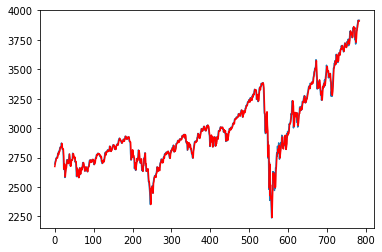

In [236]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
raw = pd.read_csv("datasets/all_features.csv")
raw = raw.drop(columns = ["SOFR","SOFRVOL","EFFRVOL","OBFR","OBFRVOL","EFFRVOL_DIFF"
                          ,"OBFR_DIFF","OBFRVOL_DIFF", "SOFR_DIFF", "SOFRVOL_DIFF"]).dropna()
train = raw[raw["date"] < "2018-00-00"]
test = raw[raw["date"] > "2018-00-00"]
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = list(train['SP500_UNNORM']), list(test['SP500_UNNORM'])
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [231]:
test['SP500_UNNORM']

KeyError: 'SP500_UNNORM'

In [218]:
raw = pd.read_csv("datasets/all_features.csv")
raw.head()

,date,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,DEXUSUK,DFII10,DFII20,DFII30,DFII5,DFII7,DLTIIT,DPCREDIT,DPRIME,EECTOT,EFFR,EFFRVOL,FRGSHPUSM649NCIS,GVIPT50002S,GVIPT50030S,GVIPT51000S,GVIPT51100S,GVIPT51110S,GVIPT51120S,GVIPT51200S,GVIPT52000S,GVIPT52100S,GVIPT521A3S,GVIPT52300S,GVIPT54000S,GVIPT54100S,GVIPT54200S,GVIPT54220S,INFECTDISEMVTRACKD,IOER,IORR,MEDCPIM158SFRBCLE,MORTGAGE15US,MORTGAGE30US,OBFR,OBFRVOL,PCUADLVWRADLVWR,PCUAINFOAINFO,PCUAMUMAMUM,PCUARETTRARETTR,PCUASHCASHC,PCUASTDSVASTDSV,PCUATRADEATRADE,PCUATRANSATRANS,PCUATRNWRATRNWR,PCUATTDSVATTDSV,PCUAWHLTRAWHLTR,PCUOMFGOMFG,PCUOMINOMIN,SFTPAGRM158SFRBSF,SOFR,SOFRVOL,SP500_NORM,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD,SIN_DATE,COS_DATE,ft3,ft5,ft10,ft100,ma7,ma21,26ema,12ema,MACD,ema,momentum,SP500_UNNORM,AAA10Y_DIFF,ASEANTOT_DIFF,BAA10Y_DIFF,BUSAPPWNSAUS_DIFF,BUSAPPWNSAUSYY_DIFF,CBUSAPPWNSAUS_DIFF,CBUSAPPWNSAUSYY_DIFF,CUUR0000SA0R_DIFF,DEXCHUS_DIFF,DEXUSEU_DIFF,DEXUSUK_DIFF,DFII10_DIFF,DFII20_DIFF,DFII30_DIFF,DFII5_DIFF,DFII7_DIFF,DLTIIT_DIFF,DPCREDIT_DIFF,DPRIME_DIFF,EECTOT_DIFF,EFFR_DIFF,EFFRVOL_DIFF,FRGSHPUSM649NCIS_DIFF,GVIPT50002S_DIFF,GVIPT50030S_DIFF,GVIPT51000S_DIFF,GVIPT51100S_DIFF,GVIPT51110S_DIFF,GVIPT51120S_DIFF,GVIPT51200S_DIFF,GVIPT52000S_DIFF,GVIPT52100S_DIFF,GVIPT521A3S_DIFF,GVIPT52300S_DIFF,GVIPT54000S_DIFF,GVIPT54100S_DIFF,GVIPT54200S_DIFF,GVIPT54220S_DIFF,INFECTDISEMVTRACKD_DIFF,IOER_DIFF,IORR_DIFF,MEDCPIM158SFRBCLE_DIFF,MORTGAGE15US_DIFF,MORTGAGE30US_DIFF,OBFR_DIFF,OBFRVOL_DIFF,PCUADLVWRADLVWR_DIFF,PCUAINFOAINFO_DIFF,PCUAMUMAMUM_DIFF,PCUARETTRARETTR_DIFF,PCUASHCASHC_DIFF,PCUASTDSVASTDSV_DIFF,PCUATRADEATRADE_DIFF,PCUATRANSATRANS_DIFF,PCUATRNWRATRNWR_DIFF,PCUATTDSVATTDSV_DIFF,PCUAWHLTRAWHLTR_DIFF,PCUOMFGOMFG_DIFF,PCUOMINOMIN_DIFF,SFTPAGRM158SFRBSF_DIFF,SOFR_DIFF,SOFRVOL_DIFF,T10YIE_DIFF,TEDRATE_DIFF,TLAACBW027NBOG_DIFF,TLBACBW027NBOG_DIFF,TSIFRGHT_DIFF,UNRATE_DIFF,WLEMUINDXD_DIFF
0,2000-01-03,-0.925802,NaN,-1.250124,NaN,NaN,NaN,NaN,NaN,1.367135,-1.168570,0.260771,NaN,NaN,NaN,NaN,NaN,2.379136,NaN,2.006954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.223793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.096708,0.051620,0.998667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,-0.856570,NaN,-1.209737,NaN,NaN,NaN,NaN,NaN,1.367259,-1.074193,0.307882,NaN,NaN,NaN,NaN,NaN,2.379136,NaN,2.006954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875030,NaN,NaN,NaN,NaN,1.846081,0.068802,0.997630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.069232,NaN,0.040387,NaN,NaN,NaN,NaN,NaN,0.000124,0.094377,0.047111,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.235623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.942788
2,2000-01-05,-0.948880,NaN,-1.277049,NaN,NaN,NaN,NaN,NaN,1.367135,-1.058259,0.329082,NaN,NaN,NaN,NaN,NaN,2.379136,NaN,2.006954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.223793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.824964,-1.585523,-1.568125,NaN,NaN,-0.374432,0.085965,0.996298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.092309,NaN,-0.067312,NaN,NaN,NaN,NaN,NaN,-0.000124,0.015934,0.021200,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Train Test Split

In [226]:
data=raw['SP500_UNNORM']
data

3222    1256.88
3223    1273.72
3224    1279.20
3226    1298.38
3227    1293.77
3228    1297.54
3229    1309.66
3230    1313.80
3232    1310.19
3233    1319.44
3234    1328.26
3235    1325.83
3236    1332.41
3238    1332.87
3239    1332.63
3240    1335.54
3241    1333.51
3242    1328.17
3244    1324.46
3245    1314.16
3246    1314.41
3247    1314.52
3248    1319.68
3250    1305.14
3251    1312.62
3252    1330.36
3253    1337.38
3256    1335.25
3257    1347.24
3258    1355.66
3259    1360.48
3260    1363.61
3263    1361.22
3264    1356.62
3265    1347.32
3266    1335.10
3267    1340.20
3269    1346.29
3270    1357.16
3271    1342.08
3272    1348.65
3273    1337.77
3275    1329.47
3276    1328.98
3277    1340.68
3278    1343.60
3279    1333.27
3281    1317.37
3282    1316.28
3283    1320.47
3284    1325.69
3285    1331.10
3288    1345.20
3289    1314.55
3290    1312.94
3291    1300.16
3293    1286.17
3294    1284.94
3295    1279.56
3296    1289.00
3297    1270.98
3299    1271.83
3300    

In [227]:
train = raw[raw["date"] < "2018-00-00"]

In [175]:
len(train), len(test)

(1711, 784)

In [210]:
# !pip3 install statsmodels
from statsmodels.tsa.arima.model import ARIMA
# train.columns

In [177]:
train.to_csv("datasets/train.csv")
test.to_csv("datasets/test.csv")

In [178]:
X_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [179]:
X_train = train.drop(columns = ["SP500_UNNORM", "date"]).values
y_train = train["SP500_UNNORM"].values


In [180]:
X_test = test.drop(columns = ["SP500_UNNORM", "date"]).values
y_test = test["SP500_UNNORM"].values

In [181]:
def split_sequence(X, y, n_steps):
    new_X = []
    new_y = []
    for i in range(1, len(X)):
        # find the end of this pattern
        end_ix = i + n_steps - 1
        # check if we are beyond the sequence
        if end_ix > len(X)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = np.hstack([X[i:end_ix+1], y[i-1:end_ix].reshape((-1,1))]), y[end_ix-1]
        new_X.append(seq_x)
        new_y.append(seq_y)
    return array(new_X), array(new_y)

In [206]:
y_train.shape


# np.mean(model_lgb.predict(X_train)-y_train)**2
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = LogisticRegression(random_state=0)
regr.fit(X_train, y_train)


ValueError: Unknown label type: 'continuous'

In [196]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=8,
                              learning_rate=0.5, n_estimators=43, max_depth=180, 
                              metric='rmse', bagging_fraction = 0.8, feature_fraction = 0.8)
model_lgb.fit(X_train, y_train)







LGBMRegressor(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.8,
              importance_type='split', learning_rate=0.5, max_depth=180,
              metric='rmse', min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=43, n_jobs=-1, num_leaves=8,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [203]:
regr.predict(X_test)
# y_test

array([2679.7482, 2680.9018, 2679.5784, 2680.4372, 2683.6749, 2683.5458,
       2683.1763, 2682.8491, 2683.2674, 2683.4118, 2682.9961, 2682.7853,
       2682.0424, 2682.0206, 2681.3091, 2682.1443, 2681.5513, 2681.5716,
       2680.9831, 2681.7214, 2680.2766, 2674.0772, 2673.4009, 2652.6177,
       2668.4003, 2667.0107, 2634.0097, 2643.1788, 2650.6236, 2663.7508,
       2665.8199, 2667.5177, 2667.2955, 2667.4956, 2667.5328, 2667.6695,
       2667.3482, 2667.7617, 2667.9372, 2666.1188, 2667.3651, 2670.7465,
       2670.8105, 2670.3932, 2670.946 , 2670.6499, 2670.8098, 2671.6276,
       2671.8878, 2671.0277, 2671.282 , 2671.2563, 2672.0206, 2671.1824,
       2671.3084, 2653.2141, 2638.4513, 2664.9365, 2637.839 , 2637.3201,
       2649.1612, 2630.8646, 2633.5794, 2646.2969, 2661.1632, 2633.7577,
       2635.3436, 2656.9277, 2648.1248, 2661.7627, 2657.1368, 2663.4858,
       2666.3034, 2669.4421, 2669.0745, 2665.3492, 2665.1823, 2650.4499,
       2648.5737, 2663.6563, 2664.5041, 2652.6042, 

In [200]:
# model_lgb.predict(X_test)
np.mean(regr.predict(X_test)-y_test)**2

# np.mean(model_lgb.predict(X_train)-y_train)**2


306247.8367910994

In [140]:
test[['date','result']].reset_index(drop=True).to_csv('result.csv')

In [133]:
test.shape

(784, 144)

## Baseline

In [104]:
import lightgbm as lgb
n_steps = 5

In [105]:
n_features = X_train.shape[1]

In [106]:
X_train_splited, y_train_splited = split_sequence(X_train, y_train, n_steps)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5 and the array at index 1 has size 0

In [107]:
X_test_splited, y_test_splited = split_sequence(X_test, y_test, n_steps)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 5 and the array at index 1 has size 0

In [40]:
X_train_splited.shape
# y_train_splited.shape

(1707, 5, 141)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(opt, loss='mse')
# fit model
model.fit(X_train_splited, y_train_splited,
          epochs=200,  batch_size=64,
          validation_data=(X_test_splited, y_test_splited))

Epoch 1/200
27/27 [==============================] - 0s 17ms/step - loss: 0.3952 - val_loss: 1.8356
Epoch 2/200
27/27 [==============================] - 0s 7ms/step - loss: 0.0138 - val_loss: 2.2172
Epoch 3/200
27/27 [==============================] - 0s 7ms/step - loss: 0.0051 - val_loss: 2.4816
Epoch 4/200
27/27 [==============================] - 0s 7ms/step - loss: 0.0065 - val_loss: 2.8388
Epoch 5/200
27/27 [==============================] - 0s 7ms/step - loss: 0.0055 - val_loss: 3.0141
Epoch 6/200
27/27 [==============================] - 0s 7ms/step - loss: 0.0049 - val_loss: 3.1697
Epoch 7/200
27/27 [==============================] - 0s 7ms/step - loss: 0.0041 - val_loss: 3.2467
Epoch 8/200
27/27 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 3.3198
Epoch 9/200
27/27 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 3.3913
Epoch 10/200
27/27 [==============================] - 0s 8ms/step - loss: 0.0015 - val_loss: 3.6802
Epoch 1

27/27 [==============================] - 0s 7ms/step - loss: 3.6109e-04 - val_loss: 1.1924
Epoch 159/200
27/27 [==============================] - 0s 7ms/step - loss: 3.2447e-04 - val_loss: 1.2741
Epoch 160/200
27/27 [==============================] - 0s 7ms/step - loss: 2.7966e-04 - val_loss: 1.2374
Epoch 161/200
27/27 [==============================] - 0s 7ms/step - loss: 4.1345e-04 - val_loss: 1.2332
Epoch 162/200
27/27 [==============================] - 0s 7ms/step - loss: 5.4968e-04 - val_loss: 1.2426
Epoch 163/200
27/27 [==============================] - 0s 7ms/step - loss: 3.9227e-04 - val_loss: 1.2364
Epoch 164/200
27/27 [==============================] - 0s 7ms/step - loss: 3.6375e-04 - val_loss: 1.2080
Epoch 165/200
27/27 [==============================] - 0s 7ms/step - loss: 3.7486e-04 - val_loss: 1.2400
Epoch 166/200
27/27 [==============================] - 0s 7ms/step - loss: 3.7167e-04 - val_loss: 1.1899
Epoch 167/200
27/27 [==============================] - 0s 6ms/step - 

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(opt, loss='mse')
# fit model
model.fit(X_train_splited, y_train_splited,
          epochs=200,  batch_size=64,
          validation_data=(X_test_splited, y_test_splited))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD

# baseline vanilla model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(opt, loss='mse')

#stack LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mse')

# Conv LSTM
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# GRU 
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
model.add(Dropout(0.2))
model.add(GRU(units=50, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(units=1))


